In [42]:
import pandas as pd
from pandas import DataFrame
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
from datetime import datetime
import matplotlib.dates as mdates

In [43]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestradoNOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)
    

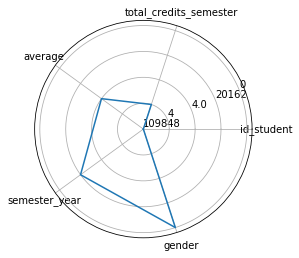

In [33]:
select_query = "select distinct id_student, total_credits_semester, average, semester_year, CASE WHEN gender = 'F' THEN 1 ELSE 0 END as gender from student_course_subject as SCS INNER JOIN students as S on SCS.id_student = S.id where semester_year = '20162';"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

# records['total_credits_semester'] = list(map(int, records['total_credits_semester']))
# records['average'] = list(map(float, records['average']))

categories = records.columns
N = len(categories)

values = records[:1].values.tolist()[0]
values += values[:1]

angles = [n / float(len(categories)) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.show()

37


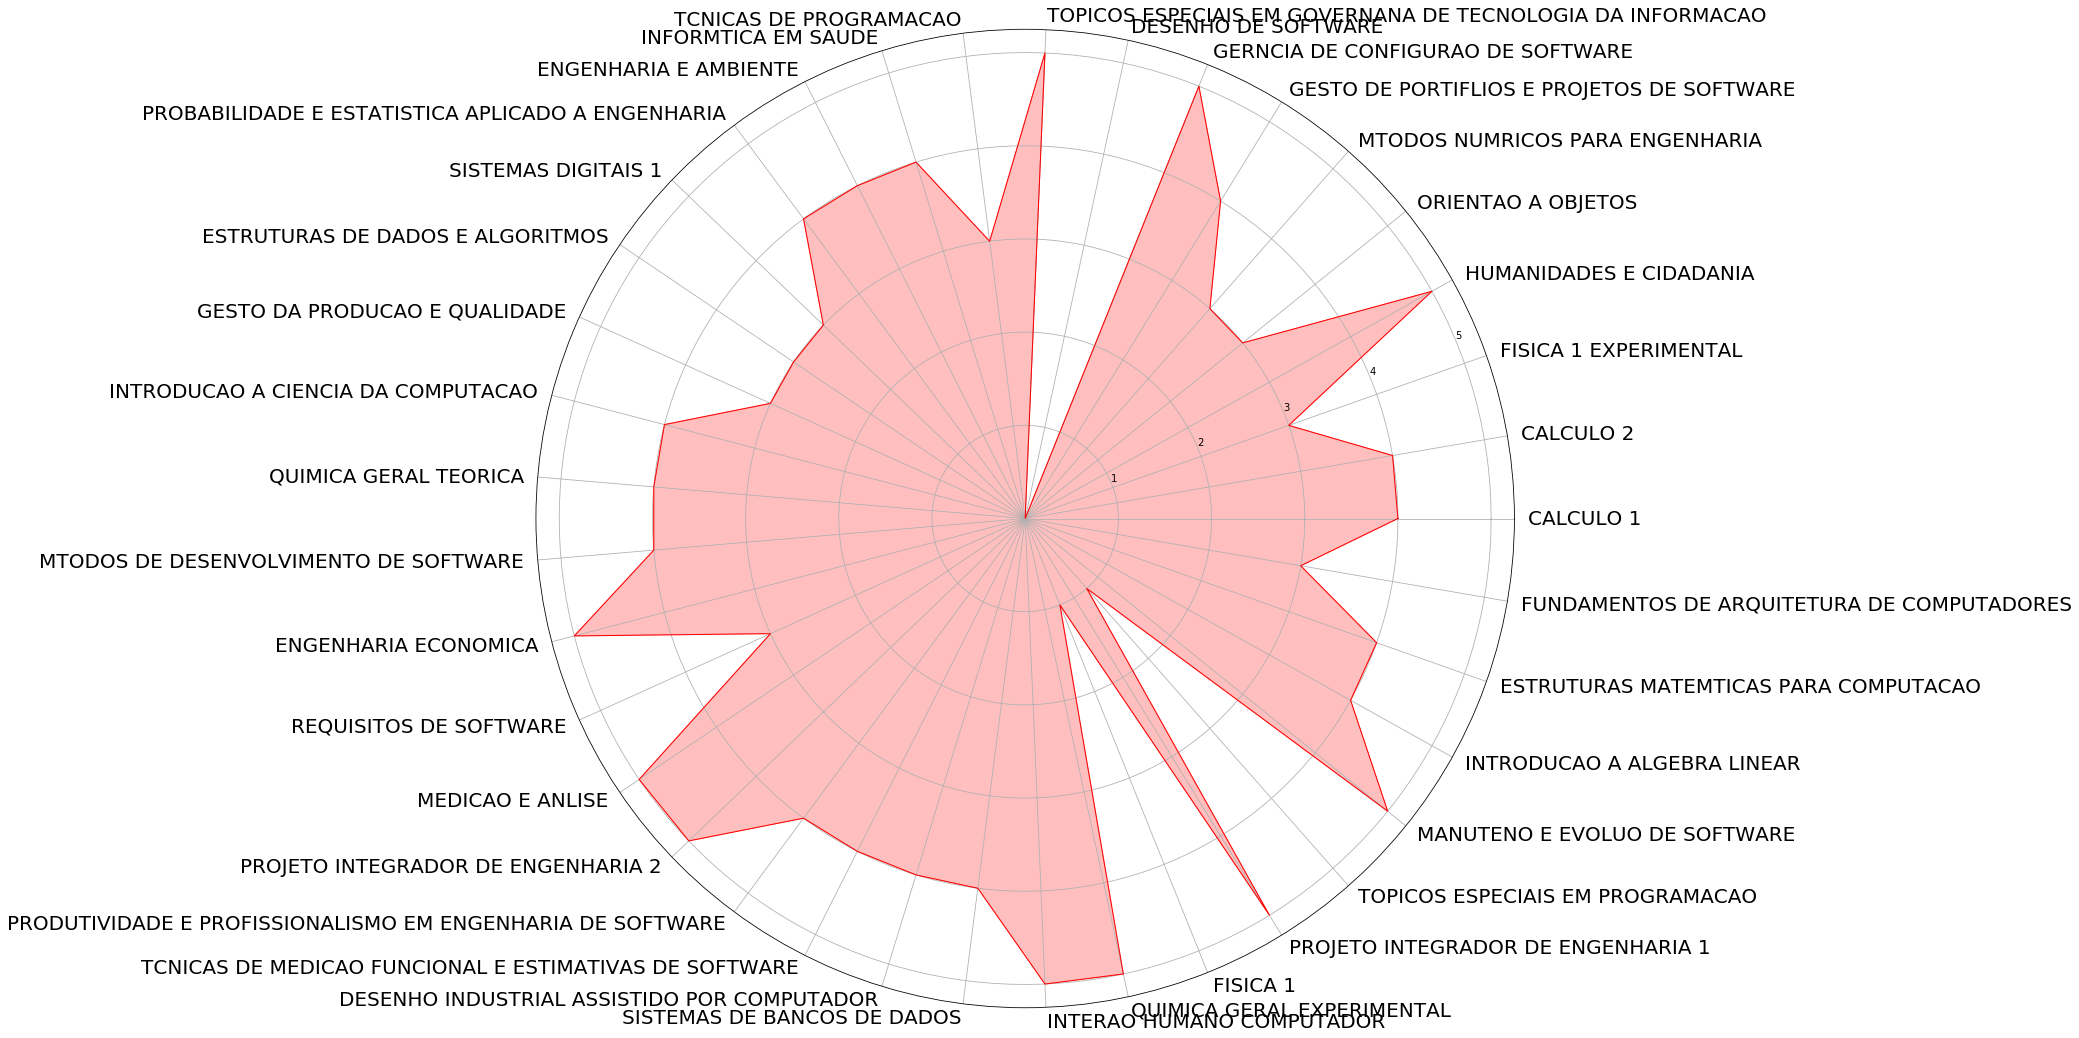

In [38]:
select_query = "select CASE           WHEN score = 'SS' THEN 5           WHEN score = 'MS' THEN 4           WHEN score = 'MM' THEN 3           WHEN score = 'MI' THEN 2           WHEN score = 'II' THEN 1           ELSE 0           END AS newScore, name from student_course_subject as SCS INNER JOIN subjects as S on SCS.id_subject = S.id where id_student = '171304';"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

records
df = DataFrame({})

for i in records['name'].values:
    value = records.loc[records['name'] == i, 'newScore'].to_list()[0]
    df[i] = [float(value)]

categories = df.columns
N = len(categories)
print(N)
values = df[:1].values.tolist()[0]
values += values[:1]

angles = [n / float(len(categories)) * 2 * pi for n in range(N)]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(20, 18), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=1)
ax.fill(angles, values, color='red', alpha=0.25)

# plt.figure(figsize=(20, 18))
# plt.polar(angles, values)

plt.xticks(angles[:-1], categories, size=20)

for label, angle in zip(ax.get_xticklabels(), angles):
    if 0 <= angle < pi/2:
        label.set_horizontalalignment('left')
    elif 3*pi/2 < angle:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
        
#     if angle in (0, pi/4):
#         label.set_horizontalalignment('left')
#     elif pi/4 < angle < 3*pi/4:
#         label.set_horizontalalignment('right')
#     else:
#         label.set_horizontalalignment('left')

plt.show()


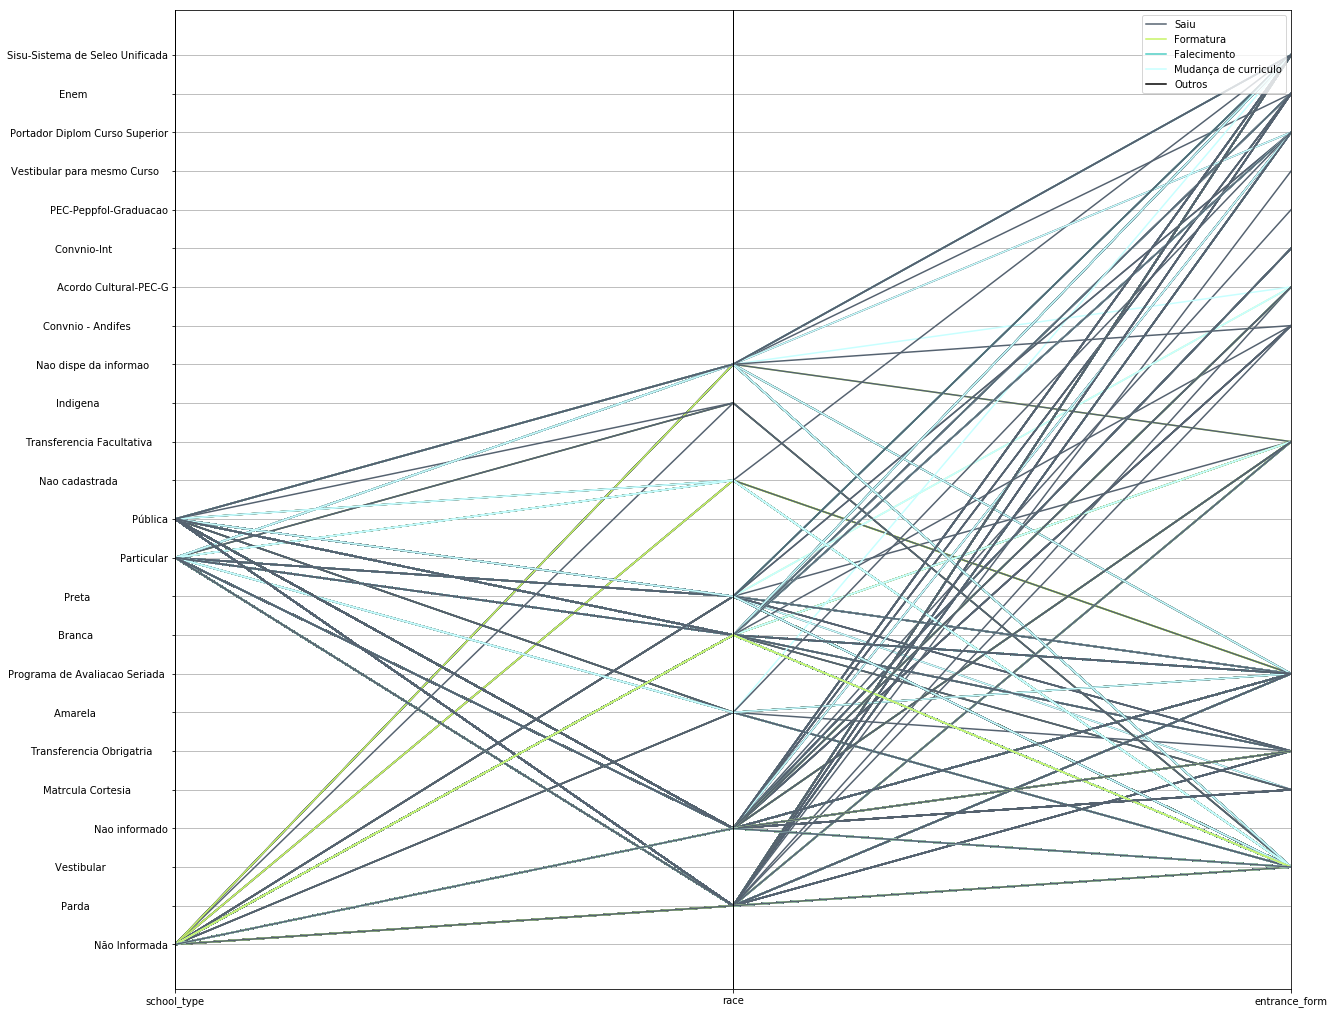

In [75]:
select_query = "select school_type, race, entrance_form, leaving_form from students as S INNER JOIN student_courses as SC on S.id = SC.id_student where leaving_form <> 'Ativo'; "
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

plt.figure(figsize=(20, 18))
pd.plotting.parallel_coordinates(
    records, 'leaving_form', color=('#556270', '#C7F464', '#4ECDC4', '#C7FFFF', '#000000')
)
# plt.show()

In [44]:
def transform_semester_year_to_dateform(d):
    semester = d[4]
    year = d[0:4]
    if semester == '0':
        return "{}-01-01".format(year)
    if semester == '1':
        return "{}-03-01".format(year)
    if semester == '2':
        return "{}-08-01".format(year)

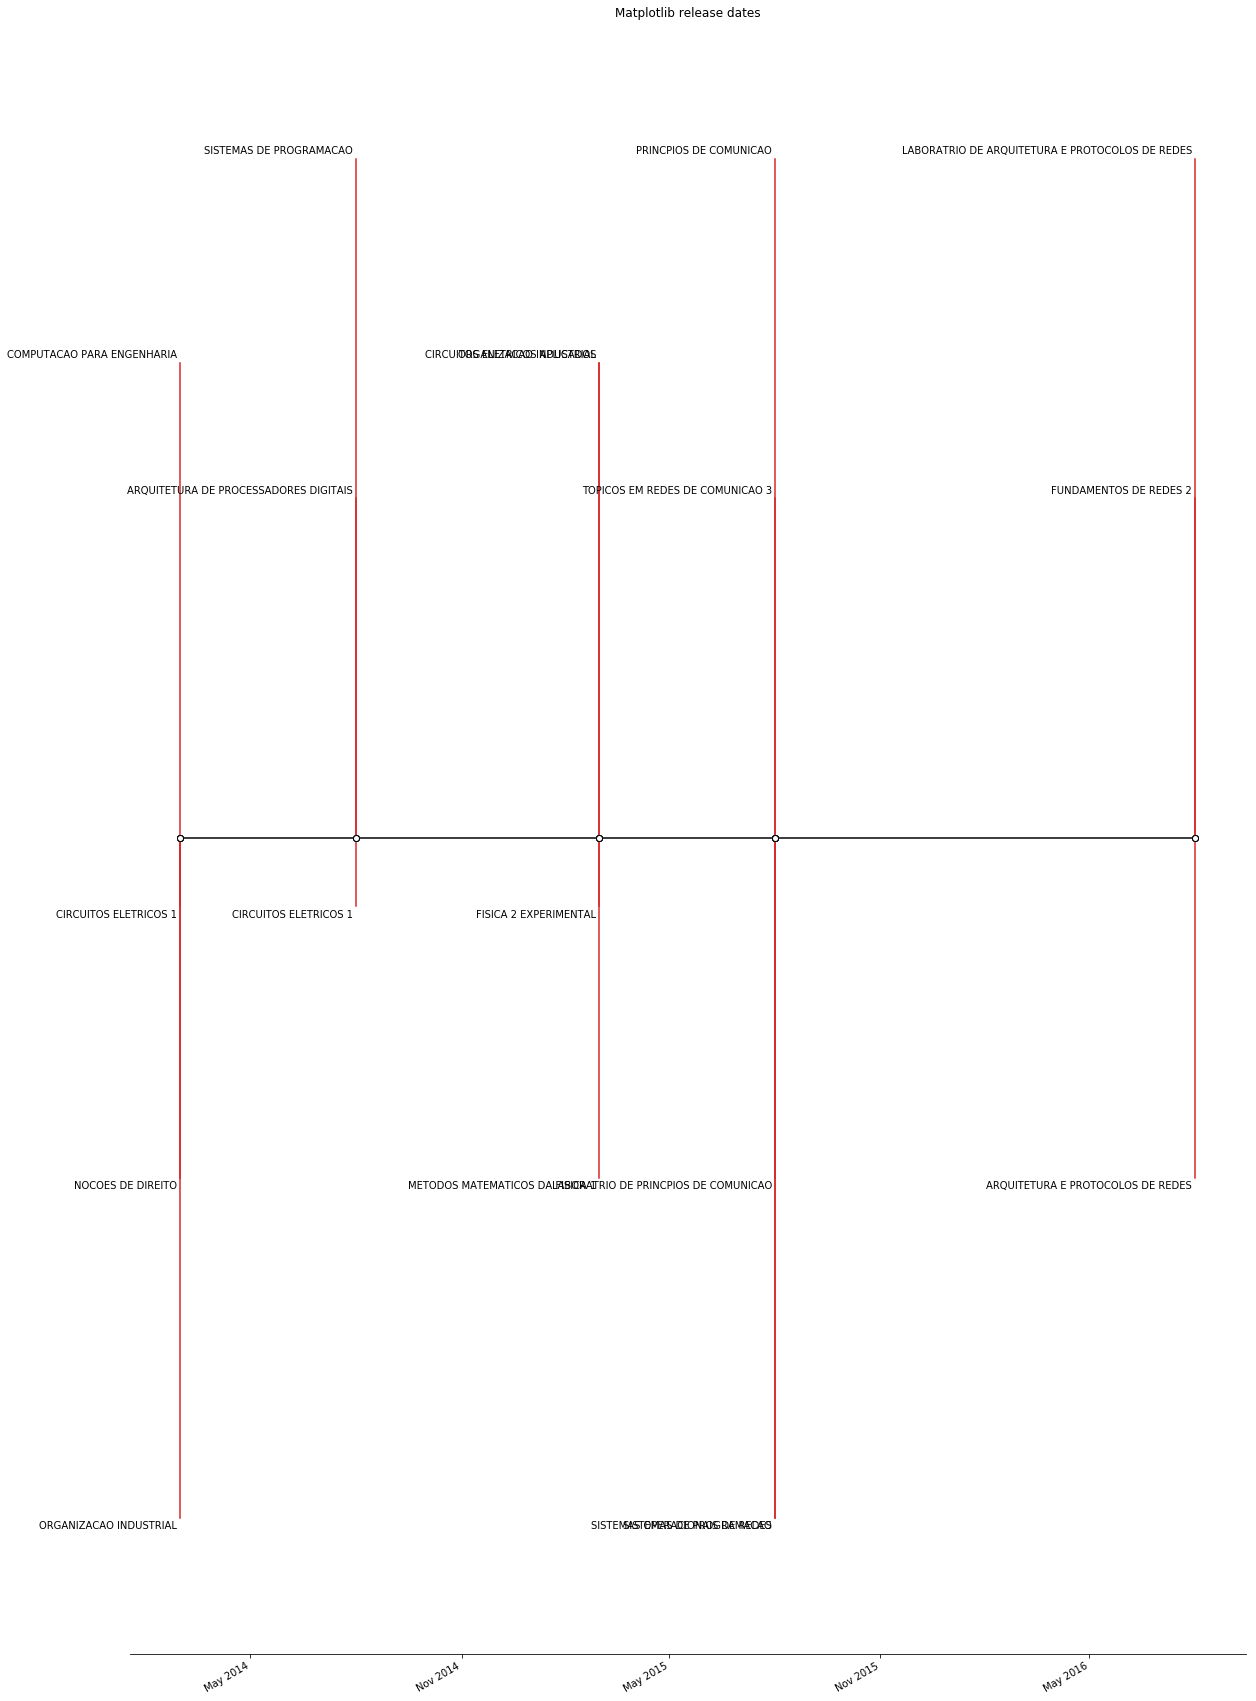

In [50]:
select_query = "select semester_year, name from student_course_subject as SCS INNER JOIN subjects as S on SCS.id_subject = S.id where SCS.id_student = '154578';"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

names = records['name'].to_list()

dates = records['semester_year'].to_list()

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [transform_semester_year_to_dateform(d) for d in dates]
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

levels = np.tile([-5, 5, -10, 10, -1, 7],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 30))
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-")

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()